# Activity on the pandas github repo during the March 10 documentation sprint

<!-- PELICAN_BEGIN_SUMMARY -->
<p>
Last weekend, Marc Garcia and many others organised a world-wide pandas documentation sprint (https://python-sprints.github.io/pandas/). The goal was to improve the pandas API documentation, and I have to say, it was a great success!
</p>
<!-- PELICAN_END_SUMMARY -->

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Really proud of everybody participating at the <a href="https://twitter.com/hashtag/pandasSprint?src=hash&amp;ref_src=twsrc%5Etfw">#pandasSprint</a>. It&#39;s been an amazing day. Special thanks to all the organizers, who did a fantastic job. And to the pandas core developers <a href="https://twitter.com/jorisvdbossche?ref_src=twsrc%5Etfw">@jorisvdbossche</a>, <a href="https://twitter.com/jreback?ref_src=twsrc%5Etfw">@jreback</a> and <a href="https://twitter.com/TomAugspurger?ref_src=twsrc%5Etfw">@TomAugspurger</a> who do an unbelievable job every day. <a href="https://t.co/iBZ7dXJDoi">pic.twitter.com/iBZ7dXJDoi</a></p>&mdash; Marc Garcia (@datapythonista) <a href="https://twitter.com/datapythonista/status/972578081671204865?ref_src=twsrc%5Etfw">March 10, 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


I thought it would be nice to make a figure of the activity on github during the sprint. Using https://www.githubarchive.org/ and the bigquery interface to their data, it was quite easy. The following query counts the hourly number of events on the [pandas-dev/pandas repo](https://github.com/pandas-dev/pandas) for the last two weeks:

```sql
SELECT 
  STRFTIME_UTC_USEC(created_at, "%Y-%m-%d %H") AS timestamp,
  COUNT(*) AS count
FROM (
  TABLE_DATE_RANGE([githubarchive:day.], 
    TIMESTAMP('2018-03-01'), 
    TIMESTAMP('2018-03-13')
  )) 
WHERE repo.name = 'pandas-dev/pandas'
GROUP BY
  timestamp,
ORDER BY
  timestamp ASC
```

The above query looks for all types of events on github, so it's a total of issues or PRs opened or closed, comments, pushed, ... (https://developer.github.com/v3/activity/events/types/).

I downloaded the result of the above query as a csv file (note: there are also packages available to directly load the result of the query in a pandas DataFrame). So we can now use pandas and matplotlib to make a graph of it.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
events = pd.read_csv("results-20180313-132419.csv", index_col=0, parse_dates=True)

In [5]:
events.head()

,count
timestamp,
2018-03-01 00:00:00,6
2018-03-01 01:00:00,24
2018-03-01 02:00:00,13
2018-03-01 03:00:00,4
2018-03-01 04:00:00,1


Some of the hours are missing because there were no recorded events, so to make sure we have a regular time series, I am using `resample` to have an hourly frequency while filling the missing hours with 0:

In [6]:
events = events.resample('H').asfreq().fillna(0)['count']

Now we can make a plot of this:

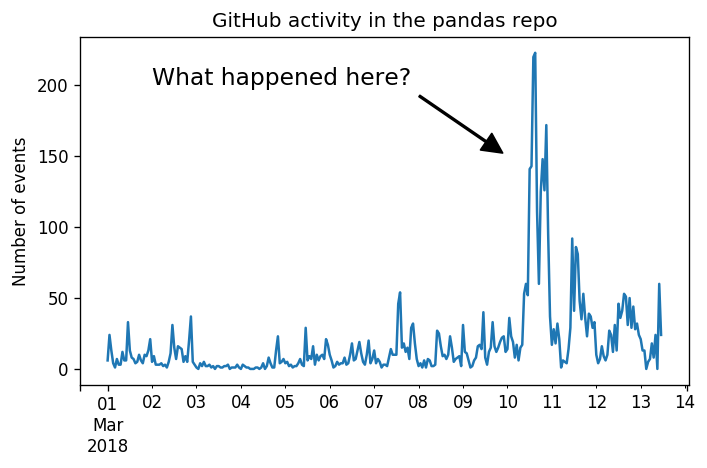

In [29]:
fig, ax = plt.subplots(dpi=120)
events.plot(ax=ax)
ax.set(xlabel='', ylabel="Number of events", title="GitHub activity in the pandas repo")
ax.annotate("What happened here?", (pd.Timestamp("2018-03-10"), 150), (pd.Timestamp("2018-03-02"), 200),
            arrowprops=dict(shrink=0.05, width=1, color='k'), fontsize=14)
fig.tight_layout()

So as expected, we clearly see a huge peak in github activity compard to the weeks before :-)